# Credible Threats - Life of Py(thon)
By The Good, The Bad and the Ugly aka. The Three Musketeers. 

Welcome to the amazing Credible Threats dataproject Jupyter Notebook. 

This notebook is *our precious*, it is *the stuff that dreams are made of*. It dives into the wonderful world of movies, and we *just keep swimming*, because *where we're going we don't need roads*. 

What is a movie? A movie is *poetry, beauty, romance, love. These are what we stay alive for*. They are stories of another world, portrayed in such a way, that though *there's no place like home*, the movies are a close second. And though movies are great, *mama always said the movies is like a box of chocolates. You never know what you're gonna get*, and she was right about that. Luckily for you, Credible Threats is at your aid. Through this dataproject, we will help you sort through the best and the worst of thousands of movies. How do we do that you might ask, well it is *elementary, dear Watson*. *We're going to have to science the shit out of this*.

Now, we know what you're thinking, *with great power comes great responsiblity*, but don't worry, *we're wizards, Harry*. In the following, we will look at IMDB data, containing over 14,000 movies, from the 1920's Metropolis to the 2010's Toy Story 3. You might say that we go *to infinity and beyond* in the world of movies.

Giving you access to this *supercalifragilisticexpialidocious* notebook, we're *making you an offer you can't refuse*, as the notebook contains summary statistics by decade, interactive histograms of ratings, and even rainbow colored graphs which will leave thinking, *I am Groot*. 

Hopefully, you won't have to stop along the way and say, *Houston, we have a problem*. 
So, *fasten your seatbelts. It's going to be a bumpy ride*. 


![ChessUrl](https://media.giphy.com/media/145hX7QVWqyili/giphy.gif "Here we go")

## Datalicious

### Importing Data

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np
from ipywidgets import Layout
import seaborn as sns
import math
import requests
from bs4 import BeautifulSoup as bs
import itertools
from ipywidgets import Layout
import time
from scipy import linalg
import scipy.optimize as optimize
import sympy as sm
from IPython.display import clear_output 
sns.set()

In [2]:
## Importing and cleaning the data 

filename = 'imdb.csv'

## Defining the function to import and clean the data
def gen_df(filename):
    """ Returns a pandas dataframe containing information about movies from the IMDB database 

    Args:
    filename (csv-file): The csv-file have to be the file imdb.csv

    Returns:
    A pandas dataframe

    Notice:
    The function will not work if other files than imdb.csv are used as input """
        
    # Get .csv.file
    data = pd.read_csv(filename, sep=';', encoding='latin-1', escapechar='\\')

    # Read file into pandas dataframe
    df = pd.DataFrame(data)

    # Drop unwanted columns
    for i in range(44,48):
        df.drop(columns=[f'Unnamed: {i}'], inplace=True)
    df.drop(columns=['fn','wordsInTitle','url'], inplace=True)

    # Keep only observations of 'movie'-type
    I = df['type'] == 'video.movie'
    df = df.loc[I]
    df.drop(columns=['type'], inplace=True)

    # Drop movies with missing observations
    df.dropna(inplace=True)

    # During the importing process, the first decimal has become 0 for all movies.
    # Thus, we replace "0"'s with ""
    df['imdbRating'] = df['imdbRating'].astype(str)
    df['imdbRating'].replace(regex=True, inplace=True,to_replace='0',value='')
    df['imdbRating'] = df['imdbRating'].astype(float)

    # Transform duration from seconds to hours
    df['duration'] = df['duration']/60**2

    # Drop years before 1920 and the year 2014 because of few obervations
    I = (df['year']>=1920) & (df['year']<=2013)
    df = df.loc[I]

    # Change the type of 'year' to integer
    df['year'] = df['year'].astype(int)    
    
    # Sort observations and reset index
    df.sort_values('year', inplace=True)
    df.reset_index(inplace=True)

    # Generating a variable that shows the decade (as a string)
    year_list = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

    df['decade'] = ''
    for i,start in enumerate(year_list):
        end = start+10
        df.loc[(df['year'] >= start) & (df['year'] < end), 'decade'] = f'{year_list[i]}s'

    return df

df = gen_df(filename)


### Descriptive Data

 In the following we generate summary statistics of year, ratings, duration, and number of ratings and wins. These are turned into an interactive tabel, where the viewer can choose to watch the statistics for the entire sample period, or for a given decade. 

In [3]:
# Summary Statistics by Decade  
# Creating list of decades to choose between
decade = ["all", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
genre_new = ['Action', 'Adventure', 'Animation', 'Biography',
         'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
         'FilmNoir', 'History', 'Horror', 'Music', 'Musical',
         'Mystery', 'Romance', 'SciFi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

# Defines a Summary Statistics function to call
def summ_stat(decade):
    """ Generates a Summary Statistics Table 
    
    Args: 
        decade (string): Decade for which the summary statistics are generated. 
                         These must be written in the format, "[decade]s", e.g. "1920s".
        
    Returns: 
        One table for each element in decade. 
        
    Notice: The function is generated so that it can be called in the function summ_stat_interactive. Thus, it is not intended to be used on its own. 
    
    """
    
    
    pd.options.display.float_format = "{:.2f}".format
    if decade == "all": 
        return df[["year", "imdbRating", "duration", "nrOfWins", "nrOfNewsArticles"]].describe() 
    else: 
        df_decade = df.loc[df["decade"] == decade]
        return df_decade[["year", "imdbRating", "duration", "nrOfWins", "nrOfNewsArticles"]].describe() 
    
# Define function which turns summary statistics function interactive
def summ_stat_interactive(): 
    
    """ Generates a interactive Summary Statistics Table, using the function summ_stat. """
    
    
    widgets.interact(summ_stat, 
    
    # Decade Dropdown 
    decade = widgets.Dropdown(
    decription="Decade", 
    options=decade, 
    value="all"));

summ_stat_interactive()


interactive(children=(Dropdown(description='decade', options=('all', '1920s', '1930s', '1940s', '1950s', '1960…

In [4]:
# Defining a function which rounds up to next hundred 
def roundup(x):
    """ Returns an integer which is perfectly divided by 100

        Args: 
            x (float): The number to round up to next hundred

        Returns: 
            A number (integer) """
    
    return int(math.ceil(x / 100.0)) * 100

## Defining a figure which plots the total numbers of movies per year or decade
def fig3_J():
    """ Generates a figure which plots the total number of movies per decade or year
    
    Args: 
        No arguments are needed.
        
    Returns: 
        An interactive plot  
        
    Notice: 
        It will raise an error if the function is given an argument!
    """
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Generating list for future use
    time_var = ['year', 'decade']
    decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
    
    ## Defining a function which plots the total numbers of movies per year or decade
    def fig(time_var):   
        """ Generates a figure which plots the total number of movies per decade or year
        
        Args: 
            time_var (string): Should be either 'year' or 'decade' depending on whether the 
            number of movies should be grouped by year or decade. 
           
        Returns: 
            An interactive plot.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """
        
        # Generate variable that counts number of observation/movies in each year/decade
        imdb['temp']=1
        imdb['tot_film'] = imdb.groupby(time_var)['temp'].transform(lambda x : x.sum())
        del imdb['temp']

        # Make new dataframe that only take one value per year/decade. 
        # The dataframe only contain the year/decade indicator and number of movies in the given year/decade
        y = pd.DataFrame(imdb.groupby(time_var)['tot_film'].first())
        y.reset_index(inplace=True)

        # Setting max value of y-axis to next hundred of max number of movies
        temp = imdb['tot_film'].max()
        y_max = roundup(temp)

        # Plotting the number of movies per year
        fig = plt.figure(figsize=(7,6))
        ax1 = fig.add_subplot(1,1,1)

        # Set different bar-width depending on the plot is movies per year or decade
        if time_var == 'year':
            ax1.bar(y[time_var], y['tot_film'], width=0.55)
        else:
            ax1.bar(y[time_var], y['tot_film'])

        ax1.set_ylabel('Numbers of movies')
        ax1.set_title(f'Figure 1: Numbers of movies, 1920-2013')
        ax1.set_ylim([0,y_max])

        # Set the ticks on the x-axis to be every 10th year (if the plots is movies per year)
        if time_var == 'year':            
            ax1.set_xticks(decades)
            
    ## Making the figure interactive so it is optionally to plot the number of movies per year or decade (year is default)
    widgets.interact(fig,
        time_var = widgets.Dropdown(description='Time unit', value='year', options=time_var, 
                    layout=Layout(width='175px')),
    );    

fig3_J()

interactive(children=(Dropdown(description='Time unit', layout=Layout(width='175px'), options=('year', 'decade…

The number of movies per year/decade has, not surprisingly, increased a lot since 1920, cf. figure 1. In the 2000s over 3300 movies were produced. This is 22 times more movies than in the 1920s where only 150 movies were produced. However, in the 2010s there was a huge drop in the numbers of movies (use 'decade' as time unit). The decrease in movies is partly due to the fact that 2010s only contains movies for four years (2010-2013). Additionally, the number of movies per year has also decreased compared to the last half of the 2000s. 

As a final comment, we have to stress that we are not sure how representative our data is. Consequently, the lower number of movies per year in the 2010s could be due to imprecise data. This uncertianty prevails for the entire dataset because not all movies are in the IMDB-database. 

## Staring into the Eyes of Genres

### Number of Movies in Each Genre

Here, we summarize each genre varible. Since each of these are dummies, the sum will equal the number of movies in each genre. These sums are then printed through a loop, so the output is a list of genres and the number of movies in each genre. Finally, the list is sorted, such that the genre with the most movies appear at the top. 

In [5]:
# Generating genre list
genre = list(df)[13:41]

# Counting movies in each genre
sum_list = []

for i in genre:
    sum_list.append(df[i].sum(axis=0))
    
sum_genre = pd.DataFrame({'Genre': genre,
                        'Sum': sum_list}).sort_values('Sum', ascending=False)

for i, row in sum_genre.iterrows():
    print(f"Number of {row['Genre']} movies: {row['Sum']:.0f}")

Number of Drama movies: 5109
Number of Comedy movies: 3327
Number of Action movies: 1772
Number of Romance movies: 1707
Number of Crime movies: 1638
Number of Adventure movies: 1456
Number of Thriller movies: 1235
Number of Horror movies: 935
Number of Documentary movies: 778
Number of Mystery movies: 750
Number of SciFi movies: 731
Number of Family movies: 685
Number of Fantasy movies: 679
Number of Biography movies: 541
Number of Animation movies: 534
Number of History movies: 460
Number of War movies: 442
Number of Short movies: 380
Number of Musical movies: 332
Number of Western movies: 292
Number of Music movies: 269
Number of Sport movies: 205
Number of FilmNoir movies: 190
Number of Adult movies: 16
Number of TalkShow movies: 3
Number of RealityTV movies: 2
Number of GameShow movies: 2
Number of News movies: 2


### Share of movies pr. genre

In [6]:
# Generate genre list
genre_list = list(df)[13:41]

def genre_share_fig():
    """ Returns a figure, which calculates the share of movies in the chosen genre. The share
        can be calculated by either year or decade"""

    def _plot_1(df,genre,timevar):
        """ Calculates the share of movies in each genre chosen, by the timevariable chose, i.e. year or decade.
        
            Args:
                df (DataFrame): Which dataframe is being used to do the calculation.
                genre (str): Which genres the shares are calculated for. 
                timevar (str): Which timevariable are the shares calculated over? Can be year or decade
            
            Returns:
                A line plot for all genres chosen.
            
            Notice:
                Does not show plot by itself, but has to be activated through another function, e.g. widgets.interact"""

        df['count'] = 1
        df['movies_year'] = df.groupby(timevar)['count'].transform(lambda x: x.sum())  

        # Plot year sum of different genres
        for i in genre:
        
            # Calculate sum of movies by timevariable, and share of movies within time that is of a certain genre
            df[f'{i}_time'] = df.groupby(timevar)[i].transform(lambda x: x.sum())
            df[f'{i} share'] = df[f'{i}_time']/df['movies_year']

            # Take first element of each timevariable group
            y_share = df.groupby(timevar)[f'{i} share'].first()

            # Plot the first elements
            plt.plot(y_share)

            # Add labels and title
            plt.xlabel(timevar)
            plt.ylabel('Share of movies')
            if len(genre) == 1:
                plt.title(f'Figure 2: Movies by genre: {i}')
            elif len(genre) > 1:
                plt.legend(loc='lower right')
                plt.title(f'Figure 2: Movies by genres')

    def plot_1(df):
        """ Interaction function which interacts with _plot_1. The function activates two widgets,
            for choosing genres and timevariable for _plot_1."""

        widgets.interact(_plot_1,
                        df = widgets.fixed(df),
                        genre = widgets.SelectMultiple(
                            options = genre_list,
                            description = 'Genres',
                            value = ['Drama', 'Comedy', 'Action'],
                            disabled = False),
                        timevar = widgets.Dropdown(
                        options = ['year', 'decade'],
                        description = 'Timevariable',
                        value = 'decade',
                        disabled = False))

    plot_1(df)

genre_share_fig()

interactive(children=(SelectMultiple(description='Genres', index=(8, 5, 0), options=('Action', 'Adult', 'Adven…

Figure 2 shows the share of movies in a certain year or decade, which is by a selected genre. In the list above, we see that drama-, comedy-, and actionmovies are the three largest genres, measured by total movies in the dataset. Looking at the evolvement their shares, we see that the share of dramamovies has fallen almost steadily since the 1920's. The share of comedy movies is the same in the 2010's as in the 1920's, but had a relatively low share from the 1940's to the 1970's. The share of actionmovies has increased quite steadily since the 1920's.

Another interesting observation is the evolvement of westernmovies, which were popular from around the 1950's to 1970's but since then have had quite a low share of the total movies.

Looking at war movies, we see a large increase in the share of movies around the 1940's, i.e. around World War II. Through the following Cold War, war movies held a relatively large though decreasing share of movies. In the 2010's they hold a relatively low share of movies.

## Rated PG 13 - Parents Strongly Cautioned

### Histogram of Number of Movies pr. Rating

The following code generates an interactive histogram, which shows the number of ratings by genre. 

In [7]:
# Interactive Histogram
def histogram(variable, genre, bins_num):
    """ Generates histogram of variable per genre
    
    Args: 
        variable (string): Variable on the vertical axis
        genre (string): Only movies of this genre is considered
        bins_num (int): Number of bins in the histogram
    
    Notice: 
        Remember quotationmarks around variable 
        bins_num must be an integer, and does not accept floats
    
    """
    
    df_hist = df.loc[df[genre] == 1]
    plt.hist(df_hist[variable], bins=bins_num)
    
    # Labels
    plt.title("Figure 3: Number of Movies pr. Rating")
    plt.xlabel("Rating")
    plt.xticks(range(1,11))
    
# histogram("imdbRating", "Comedy", 10)   # Remember quote marks around variable names. 


def hist_interactive(variable="imdbRating"): 
    """ Generate interactive histogram of variable by genre
    
    Args: 
        variable (string): Variable on the vertical axis.
        
    Default variable = "imdbRating"
    
    """
    
    
    widgets.interact(histogram, 
    variable = widgets.fixed(variable), 
    
    # Genre Dropdown
    genre = widgets.Dropdown(
    description="Genre", 
    options=genre_new, 
    value="Comedy"),
    
    # Bins slider 
    bins_num=widgets.IntSlider(
    value=10,
    description="Bins", 
    min=10,
    max=50, 
    step=1,
    disabled=False,
    continuous_update=False)
    ); 

hist_interactive()

interactive(children=(Dropdown(description='Genre', index=4, options=('Action', 'Adventure', 'Animation', 'Bio…

This histogram show us that most genre ratings are centered around 7 or 8, and slightly scewed to the left. Genres with a lot of movies typically have a wider distribution, and thus more low-rated movies.  

### Ratings over time

In [8]:
## Defining a function which plots the average IMDB rating per year or decade
def fig2_J():
    """ Generates a figure which plots the average IMDB rating (in levels and normalized) per year or decade
    
    Args: 
        No arguments are needed.
        
    Returns: 
        Two interactive plots
        
    Notice: 
        It will raise an error if the function is given an argument!
    """    
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Generating list for future use
    time_var = ['year', 'decade']
    years = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
    
    
    ## Defining function that plots the average IMDB rating (in levels and normalized) per year or decade
    def fig(time_var):    
        """ Generates a figure which plots the average IMDB 
        rating (in levels and normalized) per year or decade
        
        Args: 
            time_var (string): Should be either 'year' or 'decade' depending on if the 
            average ratings should be grouped by on year or decade. 
           
        Returns: 
            Two interactive plot.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """        
        # Creating variable that takes the average IMDB rating per year/decade
        imdb['avg_rat'] = imdb.groupby(time_var)['imdbRating'].transform(lambda x : x.mean())
        imdb['avg_rat_index'] = imdb['avg_rat'].transform(lambda x : x/x[0]*100)
        
        # Make two new dataframes that only take one value per year/decade. 
        # The dataframes only contain the year/decade indicator and average rating or normalized ratings per year/decade
        y = pd.DataFrame(imdb.groupby(time_var)['avg_rat'].first())
        y.reset_index(inplace=True)
        
        x = pd.DataFrame(imdb.groupby(time_var)['avg_rat_index'].first())
        x.reset_index(inplace=True)

        # Plotting the figures
        fig = plt.figure(figsize=(13,6))
        
        # 1st Figure (ratings in level)
        ax1 = fig.add_subplot(1,2,1)
        ax1.plot(y[time_var], y['avg_rat'])
        ax1.set_ylabel('Average rating')
        ax1.set_title(f'Figure 4: Average IMDB rating, 1920-2013')
        ax1.set_ylim([0,10])

        #2nd Figure (normalized ratings)
        ax2 = fig.add_subplot(1,2,2)
        ax2.plot(x[time_var], x['avg_rat_index'])
        if time_var == 'year':
            ax2.set_ylabel(f'Index: 1920=100')
        else:
            ax2.set_ylabel(f'Index: 1920s=100')
        ax2.set_title(f'Figure 5: Normalized average of IMDB rating, 1920-2013')
        ax2.set_ylim([80,105])
        
        # Set the ticks on the x-axis to be every 10th year (if the plots are movies per year)
        if time_var == 'year':            
            ax1.set_xticks(years)            
            ax2.set_xticks(years)
            
    ## Making the figure interactive so it is optionally to plot the ratings per year or decade (year is default)                    
    widgets.interact(fig,
        time_var = widgets.Dropdown(description='Time unit', value='year', options=time_var, 
                    layout=Layout(width='175px')),
    );    

fig2_J()

interactive(children=(Dropdown(description='Time unit', layout=Layout(width='175px'), options=('year', 'decade…

Since the beginning of our dataset in 1920, the ratings have been trending downwards. From the 1920s to the 2010s, the average rating has decreased by one rating-point which is 12-13 percentage points lower, cf. figure 4 and 5. The average ratings have decreased in allmost all decades (use 'decade' as time unit), but the ratings have been quite volatile on a year-to-year basis.

The following figures try to explain the downwarding trend from the 1920s to the 2010s. 

### Do 'good' movies have better ratings?

In [9]:
## Defining a function which plots the distribution of the IMDB rating conditioned on award wins
def fig1_J():
    """ Generates a figure which plots the distribution of the IMDB rating conditioned on award wins
    
    Args: 
        No arguments are needed.
        
    Returns: 
        An interactive plots
        
    Notice: 
        It will raise an error if the function are given an argument!
    """   
    
    ## Copiyng the dataframe to a new dataframe
    imdb = df.copy()
    
    ## Creating variable that groups number of wins and a list with the intervals
    imdb['nrw'] = 0
    imdb.loc[(imdb['nrOfWins'] > 0) & (imdb['nrOfWins'] < 10), ['nrw']] = 1
    imdb.loc[(imdb['nrOfWins'] >= 10) & (imdb['nrOfWins'] < 20), ['nrw']] = 2
    imdb.loc[(imdb['nrOfWins'] >= 20) & (imdb['nrOfWins'] < 30), ['nrw']] = 3
    imdb.loc[(imdb['nrOfWins'] >= 30) & (imdb['nrOfWins'] < 40), ['nrw']] = 4
    imdb.loc[(imdb['nrOfWins'] >= 40), ['nrw']] = 5
    
    nrwins = ['0', '1-10', '11-20', '21-30', '31-40', '+40']

    
    ## Defining a function to plot the distribution of the IMDB rating condition on award wins
    def fig(win_0, win_110, win_1120, win_2130, win_3140, win_40):
        """ Generates a figure which plots which plots the 
        distribution of the IMDB rating conditioned on award wins
        
        Args: 
            win_0: Specifies whether to plot the distribution of ratings for movies with 0 wins 
            win_110: Specifies whether to plot the distribution of ratings for movies with 1-10 wins 
            win_1120: Specifies whether to plot the distribution of ratings for movies with 11-20 wins 
            win_2130: Specifies whether to plot the distribution of ratings for movies with 21-30 wins 
            win_3140: Specifies whether to plot the distribution of ratings for movies with 31-40 wins 
            win_40: Specifies whether to plot the distribution of ratings for movies with +40 wins 
           
        Returns: 
            An interactive plot.  

        Notice: 
            The function is generated so that it can be called using widgets.interact. 
            Thus, it is not intended to be used on its own. 
            """         
        
        # Make lists to plot the win categories and give them colors
        wins = [win_0, win_110, win_1120, win_2130, win_3140, win_40]
        color = ['red', 'orange', 'yellow', 'lime', 'blue', 'purple']
        
        # Loop over win category to plot the distribution of their ratings
        for i,val in enumerate(nrwins):
            nrwins_i = imdb.loc[(imdb['nrw'] == i)]
            if wins[i] == True:  # Only plot distribution if box is 'checked'
                sns.distplot(nrwins_i['imdbRating'], hist = False, kde = True,
                         kde_kws = {'linewidth': 2}, label = val, color=color[i]
                     )
        
        # Legends and labels        
        plt.legend(loc='upper left')
        plt.title('Figure 6: IMDB rating conditioned on numbers of award wins')
        plt.xlabel('IMDB rating')
        plt.ylabel('Density')
    
    # Making the figure interactive so it is optinally which wins categories to plot
    widgets.interact(fig,
        win_0=widgets.Checkbox(description=nrwins[0], value=True, disabled=False),
        win_110=widgets.Checkbox(description=nrwins[1], value=True, disabled=False),
        win_1120=widgets.Checkbox(description=nrwins[2], value=True, disabled=False),
        win_2130=widgets.Checkbox(description=nrwins[3], value=True, disabled=False),
        win_3140=widgets.Checkbox(description=nrwins[4], value=True, disabled=False),
        win_40=widgets.Checkbox(description=nrwins[5], value=True, disabled=False),
    );

fig1_J()

interactive(children=(Checkbox(value=True, description='0'), Checkbox(value=True, description='1-10'), Checkbo…

An obvious hypothesis is that better movies have better ratings. A simple way to meassure the quality of a movie is to use the number of award wins as a proxy for quality. In line with the hypothesis, there is a positive correlation between award wins and ratings, cf. figure 6. Movies with many award wins have better ratings, and they have less variance in the ratings. 

However, the causality between award wins lead to better ratings may suffer by reverse causality. We are using cross-sectional data and cannot reject that ratings increase as a consequence of award wins. This will be the case if a person's subjective opinion is affected by other people's opinion, i.e. if the movie has won one or several awards. In the case of panel data with ratings for the same movie over time, we could control for this kind of reverse cuasality. 

### Average ratings by decade

### Swarm Plot of Ratings pr. Decade

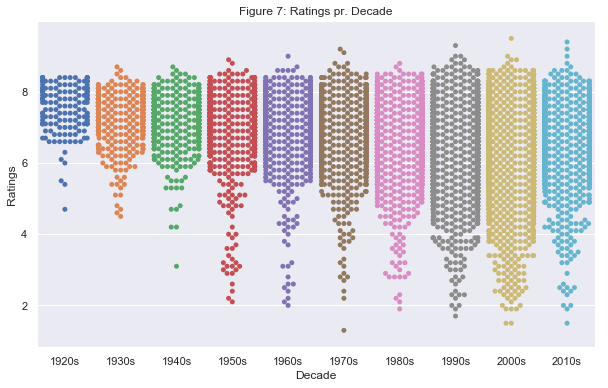

In [10]:
## NB: This peice of code takes a while to run!

# Swarm plot (Consider comparing decades) 
def swarm_plot(y="imdbRating"): 
    """ Creates a Swarm plot of y by decade
    
    Args:
    
        y (string): Variable on vertical axis. 
        
    Default: y = "imdbRating"
    Remember quotation marks around y. 
    
    """
    
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = sns.swarmplot(x = "decade", y = y, data=df)
    if y == "imdbRating": 
        ax1.set_title("Figure 7: Ratings pr. Decade")
        ax1.set_ylabel("Ratings")
    elif y == "nrOfWins": 
        ax1.set_title("Figure 7: Wins pr. Decade")
        ax1.set_ylabel("Nr. of Wins")
    elif y == "nrOfNominations": 
        ax1.set_title("Figure 7: Nominations pr. Decade")
        ax1.set_ylabel("Nr. of Nominations")
    elif y == "duration": 
        ax1.set_title("Figure 7: Duration pr. Decade")
        ax1.set_ylabel("Duration")
    else: 
        ax1.set_title(f"Figure 7: {y} pr. Decade")
        ax1.set_ylabel(y)
    ax1.set_xlabel("Decade")
    

swarm_plot()

From this swarm plot, we see that the diversity in ratings has grown across time. This is probably due to the fact, that the number of movies has been increasing since the 1920's. Though more movies are produced today, the quality of each movie is hard to maintain. However, there might be a bias, as people who watch and rate older movies on IMDB might really like these, and thus give them higher ratings, or that only the good movies from the 19020's and 1930's are listed in the IMDB dataset which we use. 

The swarm plot support our theory that a selection bias could be one reason to the decreasing ratings. On the other hand we cannot exclude that there are more bad movies today compared to 1920s.

### Conclusion

We have reached the climax and heading towards the end. We hope you have enjoyed the journey through the universe of the movies, and we are happy to say: *Chewie, we're home*. We are sorry if you think it has been a completely waste of your time, but just remember *always look on the bright sight of life* and hopefolly there is *no worries for the rest of your day(s)*. However, we admit that you could feel that you did not get the full story, not all the details. And you are completely right, we have not told you everything for the simply reason *you can't handle the truth*. Jokes apart, we will not take any more of your time, and we have nothing else to say than *hasta la vista, baby*. 

*The End*.

![ChessUrl](https://media.giphy.com/media/FlYgLKL0RuKli/giphy.gif "Bingo")

# Python's Next Top Model
By The Good, The Bad and the Ugly
aka. The Three Musketeers.

Welcome back to the wonderful Python universe of Credible Threats. We will continue the exploration of movies, and we're sure that our data project notebook will look at this notebook and think, *you complete me*. You might want to ask, *Magic mirror on the wall, who's the fairest one of all*, and the answer will be this notebook. This notebook will try to estimate the IMDb ratings of movies. And as a bonus, we even have a live-updating figure, which will leave you thinking, *it's alive, it's alive*. 

We will calculate the utility of each movie, given genres, awards, duration and so forth, and we will try to calculate the IMDb ratings for each movie, based on this utility. Finally, we will minimize the distance between our estimated ratings and the actual IMDb ratings. Now, we're sure you're thinking, *show me the money*, so this is it. 

Our utility function is given by: 
$$ U_i = \sum_{k=1}^{23}(\alpha_k G_{ik}) + \sum_{k=1920}^{2010} (\beta_k D_{ik}) + \gamma N_i + \delta W_i + \rho L_i $$. 

$$\text{Where, } G_{ik} \text{ is genre } k \text{, } D_{ik} \text{ is decade } k \text{, } N_i \text{ is award nominations, } W_i \text{ is award wins, and } L_i \text{ is duration. } $$ 

I think we can agree, it is *beauty kills the beast*. 
Now, based on this utility function, we will estimate the ratings of each movies,
$$ R_i^{model} = \frac{\exp(\omega x_i')}{1 + \exp(\omega x_i')} $$ 

where, 
$$ x_i = \big[G_1, G_2, ..., G_{23}, D_{1920}, D_{1930}, ..., D_{2010}, N_i, W_i, L_i \big] $$
$$ \omega = \big[\alpha_1, \alpha_2, ..., \alpha_{23}, \beta_{1920}, \beta_{1930}, ..., \beta_{2010}, \gamma, \delta, \rho_1 \big] $$

We then use optimize methods to solve the following: 
$$ \min_{\omega} \Big\{ \sum_{i=1}^{n} \left( R_i^{model} - R_i^{data} \right)^2 \Big\} $$

$$ \text{where, } R_i^{data} \text{ are the true IMDb ratings from the dataset, and} R_i^{model} \text{are the ratings calculated from the utility function.}$$

Throughout our notebook, you might *feel the need - the need for speed*. But, *patience you must have, my young Padawan*, because optimizing takes time. 

*Of all the python notebooks in all the towns in all the world, you walk into ours*. How lucky you are, you'll soon see why. 

So, *say hello to my little friend*, Python's next top model.  
Let's *get busy coding, or get busy dying*. 

![test](https://media.giphy.com/media/LpkBAUDg53FI8xLmg1/giphy.gif)



In [11]:
# List for later use 
variables = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
            'Drama','Family','Fantasy','FilmNoir','History','Horror','Music','Musical',
            'Mystery','Romance','SciFi','Short','Sport','Thriller','War','Western',
            'decade_1920','decade_1930','decade_1940','decade_1950','decade_1960',
            'decade_1970','decade_1980','decade_1990','decade_2000','decade_2010',
            'nrOfNominations','nrOfWins','duration']

vars_dec = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
        'Drama','Family','Fantasy','FilmNoir','History','Horror','Music','Musical',
        'Mystery','Romance','SciFi','Short','Sport','Thriller','War','Western',
        'nrOfNominations','nrOfWins','duration']

decade_list = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


# Function to calculate squared mean differences 
def sqr_diff_sum(df_X,pars):
    """ Generates a float of the sum of squared differences between the ratings from the data and the model. 

    Args: 
        df_X (DataFrame): DataFrame containing the variable in x for all observations.
        pars (List): List of parameters in omega

    Returns: 
        A float.
    """
    # Calculate the matrix product between omega and X
    util = df_X@pars  
    # Scale the product so it's between 0 and 10. This is the R_model
    df_Y['rat_model'] = 10*np.exp(util)/(1+np.exp(util)) 
    # Calculate the squared difference between R_data and R_model
    df_Y['sqr_diff'] = (df_Y['rat_model']-df_Y['rat_data'])**2 

    return df_Y['sqr_diff'].sum() # Returns the sum of the squared differences

In [12]:
def gen_df(filename):

    # Get .csv.file
    data = pd.read_csv(filename, sep=';', encoding='latin-1', escapechar='\\')

    # Read file into pandas dataframe
    df = pd.DataFrame(data)

    # Drop unwanted columns
    for i in range(44,48):
        df.drop(columns=[f'Unnamed: {i}'], inplace=True)

    # Filters out movies with less than 5000 ratings and drops some genres and other columns
    df = df.loc[(df['ratingCount']>=5000)]
    df.drop(columns=['fn','wordsInTitle','url','Adult','GameShow','News','RealityTV','TalkShow'], inplace=True)

    # Keep only observations of movie-type
    I = df['type'] == 'video.movie'
    df = df.loc[I]
    df.drop(columns=['type'], inplace=True)

    # Drop observations with missing data
    df.dropna(inplace=True)

    # Replace 0's in imdb-ratings
    df['imdbRating'] = df['imdbRating'].astype(str)
    df['imdbRating'].replace(regex=True, inplace=True,to_replace='0',value='')
    df['imdbRating'] = df['imdbRating'].astype(float)

    # Transform duration from seconds to hours
    df['duration'] = df['duration']/60**2

    # Drop years before 1920 and 2014 because of few obervations
    I = (df['year']>=1920) & (df['year']<=2013)
    df = df.loc[I]

    # Change the type of 'year' to integer
    df['year'] = df['year'].astype(int)    
    
    # Sort observations and reset index
    df.sort_values('year', inplace=True)
    df.reset_index(inplace=True)


    # Generating variable that shows the decade (as a string)
    year_list = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

    df['decade'] = ''
    for i,start in enumerate(year_list):
        end = start+10
        df.loc[(df['year'] >= start) & (df['year'] < end), 'decade'] = f'{year_list[i]}s'

    return df

In [13]:
def df_s(keep_top=None, decade=None):
    """ Prepares data for optimization by creating dummmy-variables for decades, dropping movies with less than 5000 ratings,
        dropping some variables that we don't wish to use in the model, and splitting the dataset, so we have a data set
        consisting only of the variables used in the model.
        
    Args:
        keep_top (optional, type: int): When a number (n) is put in this option, only the top n movies a kept in the dataset. This is used to remove movies for a better fit of the model

    Returns:
        df_X (type: Pandas dataframe): A dataframe consisting only of the varaibles that are used to calculate the rating.
        df_Y (type: Pandas dataframe): A dataframe consisting of the true ratings from the dataset and an index-variable, used for merging with original dataset, later in the process.

    Notice:
        The function includes global for 'df', which means that the dataframe 'df' generated, can be called outside the function. This is used so that we won't have to filter the original dataframe everytime we use it.
    """
    global df

    # Calls the file 'imdb.csv' which is located in the repository, and contains the dataset used
    filename = 'imdb.csv'

    # A function generated earlier, which cleans the dataset [Should we include this, and do some of the filtering below in that funciton?]
    df = gen_df(filename)
            
    # Keeps only top n movies, if this is specified when calling the function
    if keep_top != None:
        df = df.sort_values('imdbRating', ascending=False)
        df = df.iloc[:keep_top]
    
    if decade == None:
        # Decade dummies
        for i in decade_list:
            df[f'decade_{i}'] = 0
            df.loc[(df['decade'] == f'{i}s'),f'decade_{i}'] = 1
        
        # Splits the dataset into two datasets
        df_X = df.copy()
        df_Y = pd.DataFrame(df[['imdbRating', 'index']].copy())
        df_Y = df_Y.rename(columns = {'imdbRating':'rat_data'})

        # Rearrange and keep given columns 
        df_X = df_X.reindex(['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
                              'Drama','Family','Fantasy','FilmNoir','History','Horror','Music','Musical',
                              'Mystery','Romance','SciFi','Short','Sport','Thriller','War','Western',
                              'decade_1920','decade_1930','decade_1940','decade_1950','decade_1960',
                              'decade_1970','decade_1980','decade_1990','decade_2000','decade_2010',
                              'nrOfNominations','nrOfWins','duration'], axis=1)
            
    
    if decade != None:
        # Keeps movies from the specified decade
        df = df.loc[df['decade'] == f'{decade}s'] 

        # Splits the dataset into two datasets
        df_X = df.copy()
        df_Y = pd.DataFrame(df[['imdbRating', 'index']].copy())
        df_Y = df_Y.rename(columns = {'imdbRating':'rat_data'})

        # Rearrange columns and keep the specified variables 
        df_X = df_X.reindex(['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
                                  'Drama','Family','Fantasy','FilmNoir','History','Horror','Music','Musical',
                                  'Mystery','Romance','SciFi','Short','Sport','Thriller','War','Western',
                                  'nrOfNominations','nrOfWins','duration'], axis=1)


    return df_X, df_Y

## Optimization
We analyze preferences for movies by minimizing the sum of the squared differences from our model prediction and the true rating, i.e.:
$$ 
\min_{\omega} \Big\{ \sum_{i=1}^{n} \left( R_i^{model} - R_i^{data} \right)^2 \Big\} 
$$ 
By doing so, we'll find parameters that best describe movie preferences given our model. As we will discuss later, our model is not necessarily the best model to describe preferences, which might lead to these preferences not being accurate. <br>
If the model could predict all movie ratings correctly the parameters would perfectly describe movie preferences. For example if the parameter for action-movies were negative, the prediction would be precise, if action-movies generally had a negative impact on ratings. Of course people have much different preferences, and an interesting analysis would be, to predict preferences for different people, and by this look at a distribution of these parameters. This is not included in this project, though, mainly because of we don't have the data for it. <br>
To shorten the length of the optimizing process, and to sort out movies that makes it harder for the model to predict preferences, the optimization can be based on the top n movies, based on IMDb rating. When all movies are included in the optimizer the lowest ranking movies will have ratings around 2. Our rating predictor will in this case not rank any movies under 5. Thereby it is clear that the predictor model is not able to predict movies with very low rating. But it is able to predict movies with higher ratings.

In [14]:
def optimizer(keep_top=None, live_graph=True):
    """ Creates and optimizes the function which calculates rating based on variables in the dataset.
    
    Args:
        keep_top (optional, type: int): When a number (n) is put in this option, only the top n movies a kept in the dataset. This is used to sort out movies for a better fit of the model
        live_graph(optional, type: boolean): Produces a live graph of the optimization proces, plotting the function values against the iterations. Makes the optimizer slower, but is a good visualization of the process.
                                             
    Returns:
        result (type: scipy optimizer object): An object containing results from the optimizer among other information such as status etc.
        timer (type: int): Time of running optimizer in seconds.
                                               
    Notice:
        Uses the package scipy.optimize.minimize which optimizes functions based on a given method. Here 'Nelder-Mead' is used.
        This function defines a set of functions used in the optimizer which are not documented by docstring but comments in code.
    """
    # "Initializes" a timer for printing time of optimization
    start = time.time()
    
    # Set of globals, so variables can be called inside the functions defined in this function
    global fs
    global evals
    global x0
    global df
    global df_Y
        
    # Plots a live graph of optimization process, if chosen.
    if live_graph:
        # The live plot is created by taking the function value for each iteration and saving in a list
        def live_plot(evals, fs, ymax=10000, figsize=(7,5)):
            # Clears plot every time a new plot is created
            clear_output(wait=True)
            plt.figure(figsize=figsize)

            # Plots values and sets title, grid, labels, etc.
            plt.plot(evals, fs)
            plt.title('Figure 8: Optimizing path')
            plt.grid(True)
            plt.xlabel('Iterations')
            plt.ylabel('Function value')
            plt.xlim(0,17500)
            plt.ylim(0,ymax)

            plt.show();

    # Function to be called by optimizer each iteration. This returns function values for each iteration and plots live graph
    def collect(x):
        # Set of globals to be called in live graph-function
        global fs
        global evals
        global x0
        global fig
        global ax
        global ymax
        global x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20
        global x_21, x_22, x_23, x_24, x_25, x_26, x_27, x_28, x_29, x_30, x_31, x_32, x_33, x_34, x_35, x_36


        # Calculates function value for initial guess, for first iteration
        if evals == 0:
            fs = []
            fs.append(obj_fun(x0))
            # Generates vector of parameter estimates
            for i in range(1,37): # 1 to 36
                globals()[f'x_{i}'] = [x0[i-1]]

        # Calculates function values for current parameter values
        if evals != 0:
            fs.append(obj_fun(x))
        
        # Plots live graph if chosen
        if live_graph:
            # Calculates max y-value for axis for first iteration
            if evals == 1:
                ymax = math.ceil(obj_fun(x)/2000)*2000

            # Updates plot every 100th iteration for the first 1000 iterations
            if evals < 1000:
                if evals > 0 and evals%100 == 0:
                    live_plot(range(evals+1), fs, ymax)
            # Updates plot every 500th iteration for the rest of the process
            if evals >=1000:
                if evals%500 == 0:
                    live_plot(range(evals+1), fs, ymax)
        
        # Appends esimtates to x_vectors 
        for i in range(1,37):
            globals()[f'x_{i}'].append(x[i-1])

        # Adds one to the number of iterations each iteration
        evals += 1
    
    # Define datasets to be used using function defined earlier
    df_X, df_Y = df_s(keep_top=keep_top, decade=None)
    
    # Intiial guess
    x0 = np.zeros(len(variables))
    
    # Start iteration number
    evals = 0
    
    # Defines function to be minimized
    obj_fun = lambda x: sqr_diff_sum(df_X,x)
    
    # Run optimizer
    result = optimize.minimize(obj_fun,x0,
                               method="Nelder-Mead",
                               options={"disp":True, "maxiter":50000}, # display the results
                               callback=collect
                               ) 
    
    # End timer
    end = time.time()-start
    
    # Returns
    return result, end

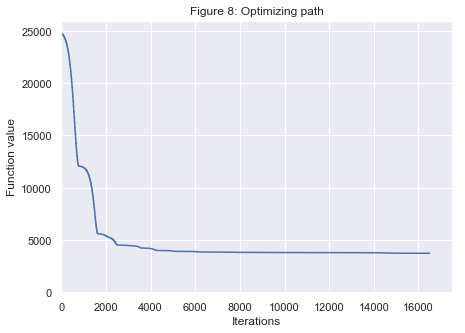

Optimization terminated successfully.
         Current function value: 3735.382286
         Iterations: 16566
         Function evaluations: 19203
         Time: 113.7475 seconds


In [15]:
# Run optimizer function and print results and time
result, timer = optimizer()
print(f'{" ":9s}Time: {timer:.4f} seconds')

# Keep copy of df and df_Y for later purpose
df_Y_all = df_Y.copy()
df_all = df.copy()

In [16]:
## Convergence of Parameter Estimates 

# Constructing dataframe which contains all parameter vectors as variables
par_dict = {"Action": x_1,
             "Adventure": x_2,
             "Animation": x_3,
             "Biography": x_4,
             "Comedy": x_5,
             "Crime": x_6,
             "Documentary": x_7,
             "Drama": x_8, 
             "Family": x_9,
             "Fantasy": x_10,
             "Film Noir": x_11,
             "History": x_12,
             "Horror": x_13,
             "Music": x_14,
             "Musical": x_15,
             "Mystery": x_16,
             "Romance": x_17,
             "SciFi": x_18, 
             "Short": x_19,
             "Sport": x_20,
             "Thriller": x_21,
             "War": x_22,
             "Western": x_23,
             "1920's": x_24,
             "1930's": x_25,
             "1940's": x_26,
             "1950's": x_27,
             "1960's": x_28,
             "1970's": x_29,
             "1980's": x_30,
             "1990's": x_31,
             "2000's": x_32,
             "2010's": x_33,
             "Nr. of Nominations": x_34, 
             "Nr. of Wins": x_35, 
             "Duration": x_36
            }

df_par = pd.DataFrame(par_dict)


##  Interactive graph of parametervalues for each iteration in optimizer 
# Chose which parameter to show 

# Interactive graph of parameter estimates
def graph(par):
    """
    Constructs a graph which shows the progress in parameter estimates foreach iteration in
    the optimizing process. 
    
    Args: 
        par (type: str): Variable name, for which the graphs shows the parameter estimates. 
                
    Returns: 
        Graph of progress in parameter estimates. 
        
    Notice: 
        The function is meant to be called within the graph_int function. 
        The graph_int function turns this graph into an interactive function, where the 
        user can choose between variables. 
        Thus, the graph is not meant to be run on its own. 
    """
    # Generating figure 
    plt.plot(df_par[par])
    
    # Grid and axes 
    plt.grid(True)
    plt.axhline(df_par[par].iloc[-1], linestyle="dashed", color="orange", label="Optimum")
    
    # Labels and Titles 
    plt.title("Figure 9: Progress in Parameter Estimation")
    plt.ylabel("Parameter Estimate")
    plt.xlabel("Nr. of Iterations")
    plt.legend()


# Interactive part: Choose between parameters 
def graph_int(): 
    """
    Constructs interactive graph from the graph function. 
    """
    widgets.interact(graph, 
                     par = widgets.Dropdown( 
                     description="Variable", 
                     options=df_par.columns.values, 
                     value="Action"));
graph_int()



interactive(children=(Dropdown(description='Variable', options=('Action', 'Adventure', 'Animation', 'Biography…

From the above figure, we notice that most parameter estimates are very volatile in the first 10,000-15,000 iterations, following which they converge towards the optimum value. 

However, this does not appear to be the case for the variables, Nr. of nominations and Nr. of awards, which get quite close to the optimum value at around the 7500th iteration. 
Additionally, we notice that the variable Duration appears to have the largest effect on ratings, which the optimzer seems to realize after approximately 2500 iterations. 

In the next part of the project we will plot the optimal estimates in a figure. Furthermore, we show how the estimates changes a lot when the sample size is restricted to only the best movies. 

In [17]:
## This piece of code solves the model for three different sample size

#### OBS: The code will take a couple of minutes to run because the model is solved three times!! ####

# List to store result for the optimization with the different sample sizes
results_list = [result.x]

# This loop solve the model for the top 500, 1000, and 2000 movies
for i in [500, 1000, 2000]:
    res_temp, timer_temp = optimizer(keep_top=i, live_graph=False)
    temp = res_temp.x
    print(f'{" ":9s}Time: {timer_temp:.4f} seconds')
    results_list.append(temp) # Store the results in the 'results_list'

Optimization terminated successfully.
         Current function value: 197.838633
         Iterations: 13628
         Function evaluations: 15779
         Time: 59.2420 seconds
Optimization terminated successfully.
         Current function value: 439.055453
         Iterations: 21224
         Function evaluations: 24448
         Time: 98.0749 seconds
Optimization terminated successfully.
         Current function value: 903.321786
         Iterations: 16176
         Function evaluations: 18626
         Time: 84.8206 seconds


In [18]:
## The code creates an interactive plot of the estimated parameters for all variables. 
## In the interactive part you can choose between estimates when the model is solved 
## for all movies or just top top 500, 1000, or 2000 rated movies. 

def fig_2(val):
    """ Generates a figure which plots estimated parameters for all variables.

    Args: 
        val (string or int): Should be one of the elements in the options-list

    Returns: 
        One interactive plot.  

    Notice: 
        The function is generated so that it can be called using widgets.interact. 
        Thus, it is not intended to be used on its own. 
    """   
    # Initiates figure
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,1,1)
    
    # Plots the estimated parameters for the chosen sample of movies
    ax1.bar(variables, results_list[options.index(val)], label=f'Estimates with {options[options.index(val)]} movies')
    
    # Scatter plot with the estimated paramters for the entire sample 
    ax1.scatter(variables, results_list[0], marker='D', s=15, zorder=2, label='Estimates with all movies')
    
    # Legends and labels 
    ax1.legend(loc="lower right")
    ax1.set_ylabel('Parameter estimates')
    ax1.set_title(f'Figure 10: Parameter estimates for {options[options.index(val)]} movies')
    ax1.set_ylim([-0.7,0.7])
    ax1.axhline(y=0,color='black',linewidth=1)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
        
options = ['All', 500, 1000, 2000] # Option list

# Making the figure interactive so the estimates are shown for the chosen sample size 
widgets.interact(fig_2,
    val = widgets.Dropdown(description='Nr. of movies', value='All', options=options, 
                ),
);   

interactive(children=(Dropdown(description='Nr. of movies', options=('All', 500, 1000, 2000), value='All'), Ou…

As also showed in the list above, duration is the varaible that effects the ratings the most. This is also the case when the model is solved for top 500, 1000, and 2000 rated movies, cf. figure 3. However, it seems like duration is the only estimate which is fairly stable. The sign of the decade dummies is an example. When the model is solved for the entire sample, the estimates are positive for the older decade-dummies, i.e. the 1920s and 1930s, and negative for the newer decade-dummies, the 2000s and 2010s. However, when the sample only contains the top 2000 rated movies we see the opposite picture. We know from figure 10 in our dataproject that the ratings of the younger movies have a larger variance with more high-rated movies but also a lot of poorly rated movies. By restricting the sample to only the best movies we drop all the bad new movies, and this is probably the reason to the positive estimates of the newer movies. 

## Heterogeneous agents
In the model above, we have only allowed the agents to have some type of preferences. But in reality people have different preferences, and thus we solve the model allowing for two types of preferences. The utility function is still the same, but with two sets of parameters, $\omega_1$ and $\omega_2$:

$$ R_i^{model1} = \frac{\exp(\omega_1 x_i')}{1 + \exp(\omega_1 x_i')} $$ 
$$ R_i^{model2} = \frac{\exp(\omega_2 x_i')}{1 + \exp(\omega_2 x_i')} $$ 
$$ R_i^{model} = \pi R_i^{model1} + (1-\pi) R_i^{model2} $$
where $\pi$ is the share of type 1 agents. 

The rest of the optimization is as stated in the introduction.

In [19]:
# Function to calculate squared mean differences 
def sqr_diff_sum_het(df_X,pars):
    """ Generates a float of the sum of squared differences between the ratings from the data and the model. 

    Args: 
        df_X (DataFrame): DataFrame containing the variable in x for all observations.
        pars (List): List of parameters in omega

    Returns: 
        A float.
    """
    # Calculate the matrix product between omega and X
    util1 = df_X@pars[1:1+len(variables)]
    util2 = df_X@pars[1+len(variables):]
    # Scale the product so it's between 0 and 10. This is the R_model
    df_Y['rat_model1'] = 10*np.exp(util1)/(1+np.exp(util1)) 
    df_Y['rat_model2'] = 10*np.exp(util2)/(1+np.exp(util2)) 
    Y = lambda pi: pi*df_Y['rat_model1']+(1-pi)*df_Y['rat_model2']
    # Calculate the squared difference between R_data and R_model
    df_Y['sqr_diff'] =  (Y(pars[0])-df_Y['rat_data'])**2 

    return df_Y['sqr_diff'].sum() # Returns the sum of the squared differences

In [20]:
def optimizer(keep_top=None, live_graph=True):
    """ Creates and optimizes the function which calculates rating based on variables in the dataset.
    
    Args:
        keep_top (optional, type: int): When a number (n) is put in this option, only the top n movies a kept in the dataset. This is used to sort out movies for a better fit of the model
        live_graph(optional, type: boolean): Produces a live graph of the optimization proces, plotting the function values against the iterations. Makes the optimizer slower, but is a good visualization of the process.
                                             
    Returns:
        result (type: scipy optimizer object): An object containing results from the optimizer among other information such as status etc.
        timer (type: int): Time of running optimizer in seconds.
                                               
    Notice:
        Uses the package scipy.optimize.minimize which optimizes functions based on a given method. Here 'Nelder-Mead' is used.
        This function defines a set of functions used in the optimizer which are not documented by docstring but comments in code.
    """
    # "Initializes" a timer for printing time of optimization
    start = time.time()
    
    # Set of globals, so variables can be called inside the functions defined in this function
    global fs
    global evals
    global x0
    global df
    global df_Y
        
    # Plots a live graph of optimization process, if chosen.
    if live_graph:
        # The live plot is created by taking the function value for each iteration and saving in a list
        def live_plot(evals, fs, ymax=10000, figsize=(7,5)):
            # Clears plot every time a new plot is created
            clear_output(wait=True)
            plt.figure(figsize=figsize)

            # Plots values and sets title, grid, labels, etc.
            plt.plot(evals, fs)
            plt.title('Figure 11: Optimizing path')
            plt.grid(True)
            plt.xlabel('Iterations')
            plt.ylabel('Function value')
            plt.xlim(0,125_000)
            plt.ylim(0,ymax)

            plt.show();

    # Function to be called by optimizer each iteration. This returns function values for each iteration and plots live graph
    def collect(x):
        # Set of globals to be called in live graph-function
        global fs
        global evals
        global x0
        global fig
        global ax
        global ymax
        global x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20
        global x_21, x_22, x_23, x_24, x_25, x_26, x_27, x_28, x_29, x_30, x_31, x_32, x_33, x_34, x_35, x_36


        # Calculates function value for initial guess, for first iteration
        if evals == 0:
            fs = []
            fs.append(obj_fun(x0))
            # Generates vector of parameter estimates
            for i in range(1,37): # 1 to 36
                globals()[f'x_{i}'] = [x0[i-1]]

        # Calculates function values for current parameter values
        if evals != 0:
            fs.append(obj_fun(x))
        
        # Plots live graph if chosen
        if live_graph:
            # Calculates max y-value for axis for first iteration
            if evals == 1:
                ymax = math.ceil(obj_fun(x)/2000)*2000

            # Updates plot every 100th iteration for the first 1000 iterations
            if evals < 1000:
                if evals > 0 and evals%100 == 0:
                    live_plot(range(evals+1), fs, ymax)
            # Updates plot every 500th iteration for the rest of the process
            if evals >=1000:
                if evals%500 == 0:
                    live_plot(range(evals+1), fs, ymax)
        
        # Appends esimtates to x_vectors 
        for i in range(1,37):
            globals()[f'x_{i}'].append(x[i-1])

        # Adds one to the number of iterations each iteration
        evals += 1
    
    # Define datasets to be used using function defined earlier
    df_X, df_Y = df_s(keep_top=keep_top, decade=None)
    
    # Intiial guess
    x0 = np.zeros(len(variables)*2+1)
    
    # Start iteration number
    evals = 0
    
    # Defines function to be minimized
    obj_fun = lambda x: sqr_diff_sum_het(df_X,x)
    
    # Run optimizer
    result = optimize.minimize(obj_fun,x0,
                               method="Nelder-Mead",
                               options={"disp":True, "maxiter":1000000}, # display the results
                               callback=collect
                               ) 
    
    # End timer
    end = time.time()-start
    
    # Returns
    return result, end

By runing the code below you can see a live-updating graph that shows the value of the sum of the squared difference for each iteration. As you will see, the sqaured difference reaches close to its minimum very quickly so the last 10,000 iterations almost don't change the value of the squard difference. The live-graph slows the optimizer down, so choose option live_graph=False, if you are impacient and don't care about an awesome live-updating graph.

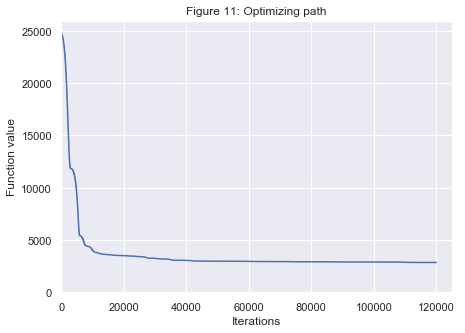

Optimization terminated successfully.
         Current function value: 2854.209709
         Iterations: 120172
         Function evaluations: 130370
         Time: 3934.0031 seconds


In [21]:
## BE AWARE THAT IT TAKES A LOT OF TIME TO RUN THE CODE!!

# Run optimizer function and print results and time
result, timer = optimizer()
print(f'{" ":9s}Time: {timer:.4f} seconds')

# Keep copy of df and df_Y for later purpose
df_Y_all = df_Y.copy()
df_all = df.copy()

In [22]:
# List of Parameter Estimates 
variables_all = ['pi','Action1','Adventure1','Animation1','Biography1','Comedy1','Crime1','Documentary1',
            'Drama1','Family1','Fantasy1','FilmNoir1','History1','Horror1','Music1','Musical1',
            'Mystery1','Romance1','SciFi1','Short1','Sport1','Thriller1','War1','Western1',
            'decade_1920_1','decade_1930_1','decade_1940_1','decade_1950_1','decade_1960_1',
            'decade_1970_1','decade_1980_1','decade_1990_1','decade_2000_1','decade_2010_1',
            'nrOfNominations1','nrOfWins1','duration1',            
            'Action2','Adventure2','Animation2','Biography2','Comedy2','Crime2','Documentary2',
            'Drama2','Family2','Fantasy2','FilmNoir2','History2','Horror2','Music2','Musical2',
            'Mystery2','Romance2','SciFi2','Short2','Sport2','Thriller2','War2','Western2',
            'decade_1920_2','decade_1930_2','decade_1940_2','decade_1950_2','decade_1960_2',
            'decade_1970_2','decade_1980_2','decade_1990_2','decade_2000_2','decade_2010_2',
            'nrOfNominations2','nrOfWins2','duration2']

# Storing the results in a scalar (pi) and two vectors (omega1 and omega2)
pi = result.x[0]
beta1 = result.x[1:1+len(variables)]
beta2 = result.x[1+len(variables):]

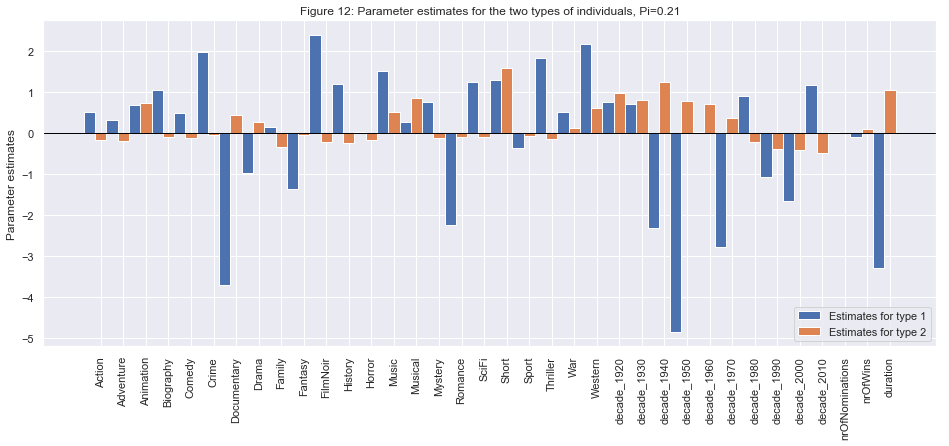

In [23]:
# Plot the estimates for the two types
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)

# Setting to make multiple (two) bars
barWidth = 0.5
r1 = np.arange(len(beta1))
r2 = [x + barWidth for x in r1]


# Plots the estimated parameters for the chosen sample of movies
ax1.bar(r1, beta1, width=barWidth, label=f'Estimates for type 1', edgecolor='white')
ax1.bar(r2, beta2,  width=barWidth, label=f'Estimates for type 2', edgecolor='white')

# Legends and labels 
ax1.legend(loc="lower right")
ax1.set_ylabel('Parameter estimates')
ax1.set_title(f'Figure 12: Parameter estimates for the two types of individuals, Pi={pi:.2f}')
plt.xticks([r + barWidth for r in range(len(beta1))], variables)
#ax1.set_ylim([-0.7,0.7])
ax1.axhline(y=0,color='black',linewidth=1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)



The figure shows substantially differences in the pefrerences of the two types. As $\pi=0.21$, 21 percent of the agents are type 1 and the remaining 79 percent are type 2. 

## Conclusion

Based on the above results, it appears that duration increases ratings by quite a lot, while Nr. of nominations and Nr. of wins doesn't appear to play a role. Meanwhile, the effect of different genres and decades are quite different. 

We hope you enjoyed our movie model project, and don't think we are completely idiots. Because as our model we conclude that *much to learn, we still have*. 

![The end](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)